EJERCICIO EN CLASE: graficar el grafo e implementar las cuatro matrices (sugerencia usar la biblioteca networkx de Python): MANUALMENTE & "automáticamente"


Matriz de especificaciones:
Origen	Destino	Conexión
v1	v2	a1
v2	v1	a2
v2	v3	a3
v3	v4	a4
v4	v1	a5

Matriz de adyacencia:
	v1	v2	v3	v4
v1	0	1	0	0
v2	1	0	1	0
v3	0	0	0	1
v4	1	0	0	0

Matriz de alcanzabilidad (Reachability):
	v1	v2	v3	v4
v1	1	1	1	1
v2	1	1	1	1
v3	1	1	1	1
v4	1	1	1	1

Matriz de distancias mínimas (conexiones):
	v1	v2	v3	v4
v1	0	1	2	3
v2	1	0	1	2
v3	2	3	0	1
v4	1	2	3	0


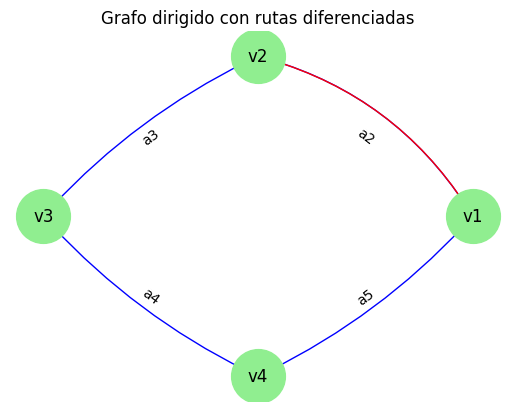

=== MENÚ BLACKTIGER_04 ===


In [17]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import display, clear_output

# Grafo dirigido
G = nx.DiGraph()

# Datos automáticos del enunciado
datos_automaticos = [
    ('v1', 'v2', 'a1'),
    ('v2', 'v1', 'a2'),
    ('v2', 'v3', 'a3'),
    ('v3', 'v4', 'a4'),
    ('v4', 'v1', 'a5')
]

# Función para agregar conexiones
def agregar_conexiones(conexiones):
    for origen, destino, conexion in conexiones:
        G.add_edge(origen, destino, label=conexion)

# Mostrar matrices
def mostrar_matrices():
    nodos = list(G.nodes())
    n = len(nodos)
    idx = {nodo: i for i, nodo in enumerate(nodos)}

    print("\nMatriz de especificaciones:")
    print("Origen\tDestino\tConexión")
    for u, v, data in G.edges(data=True):
        print(f"{u}\t{v}\t{data['label']}")

    A = np.zeros((n, n), dtype=int)
    for u, v in G.edges():
        A[idx[u]][idx[v]] = 1
    print("\nMatriz de adyacencia:")
    print_matrix(nodos, A)

    R = np.linalg.matrix_power(A + np.eye(n, dtype=int), n)
    R = (R > 0).astype(int)
    print("\nMatriz de alcanzabilidad (Reachability):")
    print_matrix(nodos, R)

    D = np.full((n, n), np.inf)
    for i in range(n):
        D[i][i] = 0
    for u, v in G.edges():
        D[idx[u]][idx[v]] = 1
    for k in range(n):
        for i in range(n):
            for j in range(n):
                if D[i][k] + D[k][j] < D[i][j]:
                    D[i][j] = D[i][k] + D[k][j]
    print("\nMatriz de distancias mínimas (conexiones):")
    print_matrix(nodos, D.astype(int))

def print_matrix(nodos, matriz):
    print("\t" + "\t".join(nodos))
    for i, fila in enumerate(matriz):
        print(f"{nodos[i]}\t" + "\t".join(map(str, fila)))

# Graficar el grafo
def graficar():
    pos = nx.circular_layout(G)
    fig, ax = plt.subplots()

    for u, v, data in G.edges(data=True):
        label = data.get('label', '')
        if (u, v) == ('v1', 'v2'):
            rad, color = 0.2, 'blue'
        elif (u, v) == ('v2', 'v1'):
            rad, color = -0.2, 'red'
        else:
            rad, color = 0.1, 'blue'
        nx.draw_networkx_edges(G, pos, edgelist=[(u, v)],
                               arrowstyle='-|>', connectionstyle=f'arc3,rad={rad}',
                               edge_color=color, ax=ax)

    nx.draw_networkx_nodes(G, pos, node_color='lightgreen', node_size=1500)
    nx.draw_networkx_labels(G, pos)

    edge_labels = nx.get_edge_attributes(G, 'label')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels,
                                 font_color='black', label_pos=0.5)

    plt.title("Grafo dirigido con rutas diferenciadas")
    plt.axis('off')
    plt.show()

# Función para opción 1: automático
def ejecutar_automatico(b=None):
    clear_output()
    G.clear()
    agregar_conexiones(datos_automaticos)
    mostrar_matrices()
    graficar()
    mostrar_menu()

# Función para opción 2: manual
def ejecutar_manual(b=None):
    clear_output()

    rutas = []
    print(">>> Ingrese sus rutas de forma manual.")
    print(" Ingrese ruta de inicio, ruta de fin y arista.\n Cuando termine presione enter, borre y escriba de nuevo")
    print("Ejemplo: v1 v2 a1\nCuando termine todas sus rutas, escriba 'fin' y precione enter")

    def ingresar_rutas(change):
        if change['new'] == 'fin':
            input_box.disabled = True
            agregar_conexiones(rutas)
            mostrar_matrices()
            graficar()
            mostrar_menu()
        else:
            try:
                origen, destino, conexion = change['new'].split()
                rutas.append((origen, destino, conexion))
            except:
                print("Formato incorrecto. Use: origen destino conexión")

    input_box = widgets.Text(description="Ruta:")
    input_box.observe(ingresar_rutas, names='value')
    display(input_box)

# Función para mostrar menú en Colab
def mostrar_menu():
    print("=== MENÚ BLACKTIGER_04 ===")
    b1 = widgets.Button(description="1. Generar automáticamente")
    b2 = widgets.Button(description="2. Ingresar rutas manualmente")
    b3 = widgets.Button(description="3. Salir")

    b1.on_click(ejecutar_automatico)
    b2.on_click(ejecutar_manual)
    b3.on_click(lambda b: clear_output())

    display(widgets.HBox([b1, b2, b3]))

# Ejecutar
mostrar_menu()

